#  Logistic Regression
We will apply logistic regression to binary classification problems. We will first jump in quickly to use sklearn (scikit-learn) to build a logistic regression model on a toy dataset. After this, we will work with a few datasets, some randomly generated (i.e. artificial) and some real-life data.

## Round 0: Jumping in.

In this mock example, we will show how trivial it is to get started with scikit-learn to perform logistic regression on a toy dataset. 

First, some imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import *
from sklearn.cross_validation import cross_val_score

import pandas as pd
from patsy import dmatrices

import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols

import seaborn as sns
sns.set(style="white")

In [2]:
from __future__ import print_function

The __future__ module is a real Python module. You will often see constructs from __future__ import division. What do you think this line does? 

In the above we imported a whole bunch of stuff, some of which we will not need to use right now. First, a very small hand-crafted example to get the bearings.

In [3]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
# X = [(1, 2, 2), (2, 3, 7), (1, 3, 1), (4, 5, 20)]
# X is the list of features of the training examples.
#print(len(X))
# Gives number of training examples.

#print(len(X[0]))
#print (type(X[0]))
# number of features

y = [1, 0, 1, 1]

model = LogisticRegression() # model = Classifier()
model = model.fit(X, y)
model.score(X, y)

0.75

...and, we are up and running! We have trained our first logistic regression model! 

Here, X is the list of feature vectors, one for each training example. Also, y is the list of target variables, again, one for each training example. Note, that there are 4 training examples here.

The __score__ here is the "accuracy". Accuracy is one of many metrics (others are precision, recall, F1-score, etc.). Metrics help us understand how good (or bad) a model is performing. 

In this specific case, the accuracy is 3/4. What do you think the model is doing?

Let's play with the target variables some more: let's make all the target variables 1.


In [4]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = [1, 1, 1, 1]

model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

Hmm... that went wrong! The calls went all the way up and then returned with an error that there needs to be samples of at least 2 classes. Next try...

In [5]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = [1, 0, 0, 1]

model = LogisticRegression()
model = model.fit(X, y)
print(model.score(X, y))
model.predict(X)

0.5


array([0, 1, 0, 1])

In [6]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = [1, 0, 1, 0]

model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

1.0

... and what does this model predict on the input (1,2)? On the input (3,4)?

In [7]:
model.predict([(2,2), (3, 4)])

array([0, 0])

While logistic regression predicts the class label for (new) samples, we can actually get more information as to the actual probabilities it assigns to a (sample, label) combo. For that, we need to use the method predict_proba

In [8]:
model.predict_proba([(2,2), (3, 4)])

array([[ 0.64611459,  0.35388541],
       [ 0.71421389,  0.28578611]])

#### Other metrics

The score reported by model.score is the accuracy of the classifier. What is the metric that we should be targeting or measuring our classifiers by?

The popular metrics are:
- Precision
- Recall 
- PR-AUC
- AUC (Area Under the ROC Curve)
- F1 score
- accuracy

Discuss the confusion matrix, and how these measures are computed. 
Link: https://en.wikipedia.org/wiki/Precision_and_recall

In [9]:
y_pred = model.predict(X[:3])
y_true = y[:3]

y_pred_prob = model.predict_proba(X[:3])[:,0]

print(y_true) 
print(y_pred)
print(y_pred_prob)

[1, 0, 1]
[1 0 1]
[ 0.49086206  0.60818552  0.45044619]


In [10]:
print(confusion_matrix(y_true, y_pred))

[[1 0]
 [0 2]]


In [11]:
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))

1.0
1.0


In [12]:
print(log_loss(y_true, y_pred))

9.99200722163e-16


In [13]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
print(precision)
print(recall)
print(thresholds)

[ 0.66666667  0.5         0.          1.        ]
[ 1.   0.5  0.   0. ]
[ 0.45044619  0.49086206  0.60818552]


##### With a random target
In the following model, we will take a random target as y. This is essentially to demonstrate an use-case of np.random.randint.

In [14]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = np.random.randint(2, size = 4)
print(y)
model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

[1 1 1 1]


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

##### Question to audience:

Debug this! 

### Plots
Visualization is a significant part of any data analysis activity. Here, we will use matplotlib for our plotting needs. A short example will indicate how to go about coloring points. For regression tasks, such as linear regression, we need use only one color, while for classification problems we would need to use multiple colors. Since most of this presentation will involve binary classification, we will use the two colors __red__ and __blue__.

Note that for actual logistic regression tasks, the training examples may have 1000s (or even millions) of features, and it is not feasible to visualize as we do below (there do exist techniques for dimension reduction such as t-SNE etc. in order to make visualization of the most interesting dimensions possible).

First, let's color all the points in X in a single color (say, red).

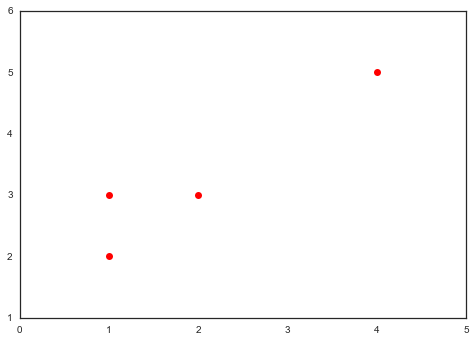

In [15]:
X1 = [i for (i,j) in X]
Y1 = [j for (i,j) in X]
plt.plot(X1, Y1, 'ro')

# Set up axes
x_min = np.min(X1) - 1
x_max = np.max(X1) + 1
y_min = np.min(Y1) - 1
y_max = np.max(Y1) + 1
plt.axis([x_min, x_max, y_min, y_max]) # Note the list/array of the min/max values here.
plt.show()

Now we proceed to color according to the category/labels of the input points.

In [16]:
a = np.array([1, 2])
b = np.array([3,4])
np.append(a, b)

array([1, 2, 3, 4])

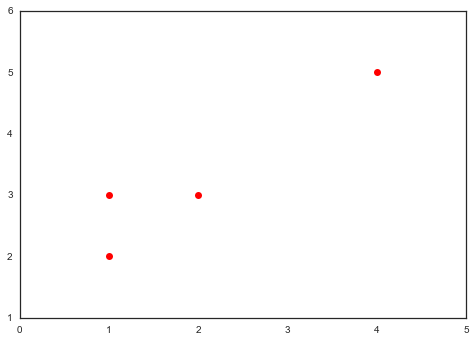

In [17]:
C0 = [X[i] for i in range(len(y)) if y[i] == 0] # C0 for color class 0.
C0_x = [i for (i,j) in C0]
C0_y = [j for (i,j) in C0]
plt.plot(C0_x, C0_y, 'bo')

C1 = [X[i] for i in range(len(y)) if y[i] == 1] # C1 for color class 1.
C1_x = [i for (i,j) in C1]
C1_y = [j for (i,j) in C1]
plt.plot(C1_x, C1_y, 'ro')

x_min = np.min(np.append(C0_x,C1_x)) - 1
x_max = np.max(np.append(C0_x,C1_x)) + 1

y_min = np.min(np.append(C0_y, C1_y)) - 1
y_max = np.max(np.append(C0_y, C1_y)) + 1

plt.axis([x_min, x_max, y_min, y_max])
plt.show()

## Round 1: A larger example

But, hey this was unfair. We trained the model on some training data, and we scored the model off (subsets of) the same dataset? That cannot be right. So, we have to split the data into training and test data.

In [18]:
# template: make_classification(n_samples, n_features, n_informative, n_redundant, n_classes = 2, weights, random_state)
X, y = make_classification(300, 2, 2, 0, weights=[.6, .4], random_state=25)

In [19]:
# Train on 100 of the samples (the training set)
clf = LogisticRegression().fit(X[:150], y[:150])

In the above, change
- n_samples
- weights between the two classes
- random_state

and see the impact on
- accuracy as in clf.score
- plot of the test data.

In [20]:
# Plotting. 
# Check out 
# what xx, len(xx) is
# what np.c_ does

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
acc = clf.score(X[150:], y[150:])
print(acc)

0.886666666667


[(-5, 5),
 (-5, 5),
 None]

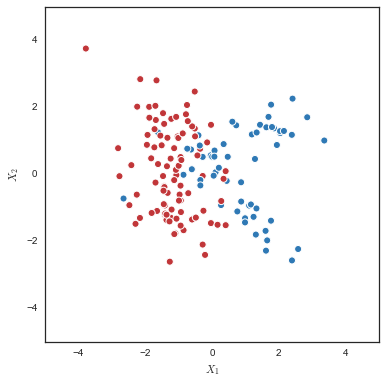

In [21]:
f, ax = plt.subplots(figsize = (8,6))
ax.scatter(X[150:,0], X[150:, 1], c=y[150:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

[(-5, 5),
 (-5, 5),
 None]

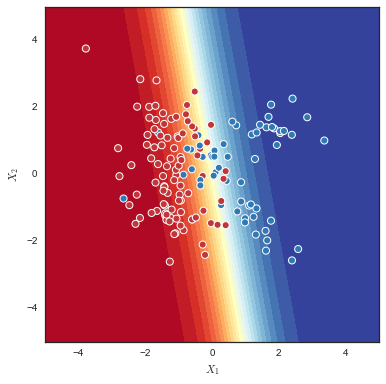

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdYlBu",
                      vmin=0, vmax=1)

# Set up the contour bar
#ax_c = f.colorbar(contour)
#ax_c.set_label("$P(y = 1)$")
#ax_c.set_ticks([0, .25, .5, .75, 1])

# Plot the outputs on the test data.
ax.scatter(X[150:,0], X[150:, 1], c=y[150:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

Credits: 
    http://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
    
All colormaps are at: 

- http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
- http://chrisalbon.com/python/set_the_color_of_a_matplotlib.html

More realistic datasets?

Most Python packages come equipped with some sample datasets. For instance the __statsmodels__ package has a whole bunch of datasets as in http://statsmodels.sourceforge.net/devel/datasets/index.html

## Round 3

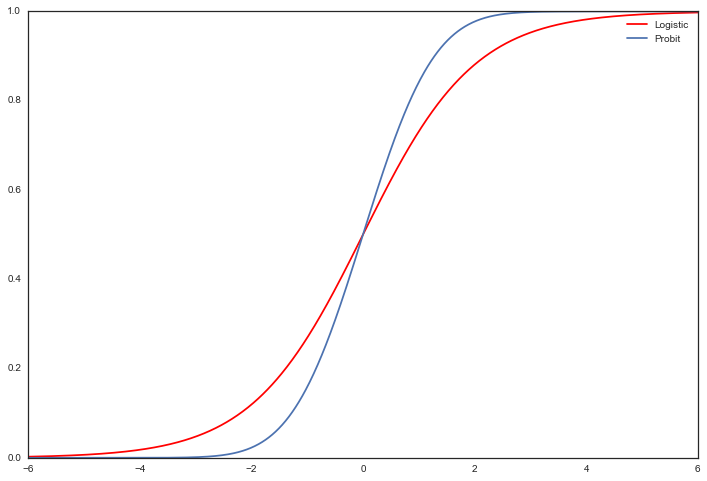

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();